## 获得前n个主成分

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100. , size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100) # 加了一个噪音

In [28]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

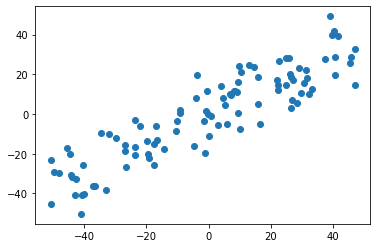

In [29]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [30]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

def df(w, X): #梯度
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):

    w = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1

    return w

In [31]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.79479021, 0.60688427])

### 求第二主成分

In [32]:
# X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w) * w # 公式
X2 = X - X.dot(w).reshape(-1, 1) * w

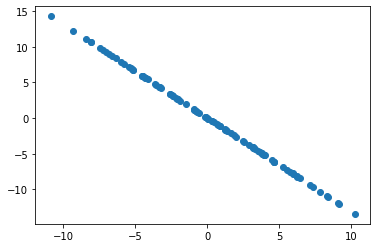

In [33]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [34]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.60688668, -0.79478837])

In [35]:
w.dot(w2) # w 和 w2 相互垂直，所以结果接近于0
# w · w2 · cos90° = 0

3.0333510339652925e-06

In [42]:
def first_n_components(n, X, eta = 0.01, n_iters=1e4, epsilon=1e-8):

    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)

        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w

    return res

In [43]:
first_n_components(2, X)

[array([0.79479009, 0.60688443]), array([ 0.6068867 , -0.79478836])]